# ***NYC AIRBNB DATA ANALYSIS ***

In [1]:
#Connecting colab to drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing all libraries needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score 

In [3]:
#Reading the file from drive
df = pd.read_csv('/content/drive/MyDrive/Airbnb_Open_Data.csv')

<ipython-input-3-83ce41b28d39>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Airbnb_Open_Data.csv')


In [4]:
df.shape

(102599, 26)

In [5]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
#to display first five observations
df.head()   

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
#display bottom 5 observations
df.tail() 

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [8]:
#to better understand the data
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [9]:
#checking for duplicates
df.nunique()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [10]:
 #check number of missing records in each column
df.isnull().sum() 

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

# ***Data Cleaning***

In [11]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [12]:
#Replacing blank values with underscore and converting everything to lower case.
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [13]:

df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [14]:
#CHANGING DATA TYPE.
#"host_identity_verified" and "instant_bookable" should be a boolean.
#"cancellation_policy" and "room_type" should be categorical.
#"construction_year", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "review_rate_number" and "availability_365" should be integer.
#"price" and "service_fee" should be float.
#"last_review" should be datetime.

df.instant_bookable = df.instant_bookable.astype("boolean")
df.host_identity_verified = df.host_identity_verified.replace({"unconfirmed":False,"verified":True})
df.host_identity_verified = df.host_identity_verified.astype("boolean")
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=["flexible", "moderate", "strict"], ordered=True)

df.cancellation_policy = df.cancellation_policy.astype(cat_type)

cat_type2 = CategoricalDtype(categories=df.room_type.unique(), ordered=False)

df.room_type = df.room_type.astype(cat_type2)

to_int = ["construction_year", "minimum_nights", 
          "number_of_reviews", "calculated_host_listings_count", 
          "review_rate_number", "availability_365"]

for column in to_int:
    df[column] = df[column].astype("Int64")

df.price = df.price.str.strip("$").str.strip().str.replace(",","").astype("float64")
df.service_fee = df.service_fee.str.strip("$").str.strip().str.replace(",","").astype("float64")

df["last_review"] = pd.to_datetime(df.last_review, format="%m/%d/%Y", errors="raise")


In [15]:
#checking new data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102349 non-null  object        
 2   host_id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  boolean       
 4   host_name                       102193 non-null  object        
 5   neighbourhood_group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country_code                    102468 non-null  object 

In [16]:
#Making a new data frame with oly columns that are needed for analysis.

selected_obj = ["neighbourhood_group"]

selected_num = [
    "id", # Airbnb's unique identifier for the listing
    "host_id", # Airbnb's unique identifier for the host
    "construction_year",
    "price", # How much a room costs per night
    "service_fee", 
    "minimum_nights",
    "number_of_reviews",
    "review_rate_number"
]

selected_bool_cat = [
    "host_identity_verified", # Whether the identity of the host was verified or not
    "instant_bookable", # Whether the guest can book the listing without the host being required to accept their request
    "cancellation_policy",
    "room_type",
]

selected_datetime = ["last_review"] # The date of the last review 

selected_columns = selected_obj + selected_num + selected_bool_cat + selected_datetime

nycdf = df[selected_columns].copy()

In [17]:
nycdf.isnull().sum() 

neighbourhood_group          29
id                            0
host_id                       0
construction_year           214
price                       247
service_fee                 273
minimum_nights              409
number_of_reviews           183
review_rate_number          326
host_identity_verified      289
instant_bookable            105
cancellation_policy          76
room_type                     0
last_review               15893
dtype: int64

In [18]:
#Dealing with null values
nycdf.dropna(inplace=True)

In [19]:
#Checking for unique values.
nycdf.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'Queens', 'Staten Island',
       'Bronx'], dtype=object)

In [20]:
nycdf.loc[nycdf.neighbourhood_group == "brookln", "neighbourhood_group"] = "Brooklyn"
nycdf.loc[nycdf.neighbourhood_group == "manhatan", "neighbourhood_group"] = "Manhattan"

In [21]:
#Checking for duplicates values and removing them.

nycdf.duplicated().sum()

467

In [22]:
nycdf.drop_duplicates(inplace=True)

In [23]:
#Review of cleaned dataframe 

nycdf.info

<bound method DataFrame.info of        neighbourhood_group        id      host_id  construction_year   price  \
0                 Brooklyn   1001254  80014485718               2020   966.0   
1                Manhattan   1002102  52335172823               2007   142.0   
3                 Brooklyn   1002755  85098326012               2005   368.0   
4                Manhattan   1003689  92037596077               2009   204.0   
5                Manhattan   1004098  45498551794               2013   577.0   
...                    ...       ...          ...                ...     ...   
102040              Queens  57358028  56457739998               2022   982.0   
102041              Queens  57358580  60176837202               2020   946.0   
102042           Manhattan  57359133  68411243647               2012   706.0   
102043           Manhattan  57359685  95625271612               2020  1043.0   
102044            Brooklyn  57360237  83006936257               2010   809.0   

       

In [24]:
nycdf.describe

<bound method NDFrame.describe of        neighbourhood_group        id      host_id  construction_year   price  \
0                 Brooklyn   1001254  80014485718               2020   966.0   
1                Manhattan   1002102  52335172823               2007   142.0   
3                 Brooklyn   1002755  85098326012               2005   368.0   
4                Manhattan   1003689  92037596077               2009   204.0   
5                Manhattan   1004098  45498551794               2013   577.0   
...                    ...       ...          ...                ...     ...   
102040              Queens  57358028  56457739998               2022   982.0   
102041              Queens  57358580  60176837202               2020   946.0   
102042           Manhattan  57359133  68411243647               2012   706.0   
102043           Manhattan  57359685  95625271612               2020  1043.0   
102044            Brooklyn  57360237  83006936257               2010   809.0   

     

# **Data Analysis and Visualization**

How do review details (e.g. number of reviews, reviews per month, review rate number) affect the popularity and price of an Airbnb listing, and what are the most common complaints and feedback from guests?

In [25]:
# group data by neighborhood group and compute average price
neighborhood_prices = nycdf.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# print results
print("The average prices based on neighbourhood group: ",neighborhood_prices)

The average prices based on neighbourhood group:  neighbourhood_group
Queens           630.520199
Bronx            629.561304
Brooklyn         627.236966
Manhattan        623.254184
Staten Island    622.918072
Name: price, dtype: float64


Analysis of the relationship between neighborhood group and cancellation policy


In [26]:
#compute contingency table of neighborhood group and cancellation policy
cont_table = pd.crosstab(nycdf['neighbourhood_group'], nycdf['cancellation_policy'])

#print result
print(cont_table)

cancellation_policy  flexible  moderate  strict
neighbourhood_group                            
Bronx                     768       770     762
Brooklyn                11611     11757   11789
Manhattan               11753     11764   11615
Queens                   3703      3793    3767
Staten Island             273       287     270


What is the ratio of verified hosts that offers Airbnb rooms?

In [27]:
# What are the ratio of verified hosts?
verified_hosts = nycdf['host_identity_verified'].value_counts()

# Let's plot them using plotly's pie chart
fig = px.pie(verified_hosts,
            values=verified_hosts.values,
            names=['Unverified', 'Verified'],
            title='Ratio of verified hosts',
            template='plotly_dark'
)

fig.update_layout(font=dict(size=20, color='white', family='Avenir'))

fig.show()

What are the average price for each room type?

In [28]:
# What are the average price for each room type?
price_per_room_type = nycdf.groupby('room_type')['price'].median()

# Let's plot them using plotly's barplot with value counts
fig = px.bar(price_per_room_type,
            x=price_per_room_type.index,
            y=price_per_room_type.values,
            labels={'x': 'Room type', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_room_type.values],
            title='Average price per room type in USD',
            color_discrete_sequence=px.colors.sequential.Bluyl,
            template='plotly_dark'
)

fig.update_layout(font=dict(size=16, color='white', family='Avenir'))

fig.show()

Visualisation to show the wordcloud for AirBnb Neighbourhood

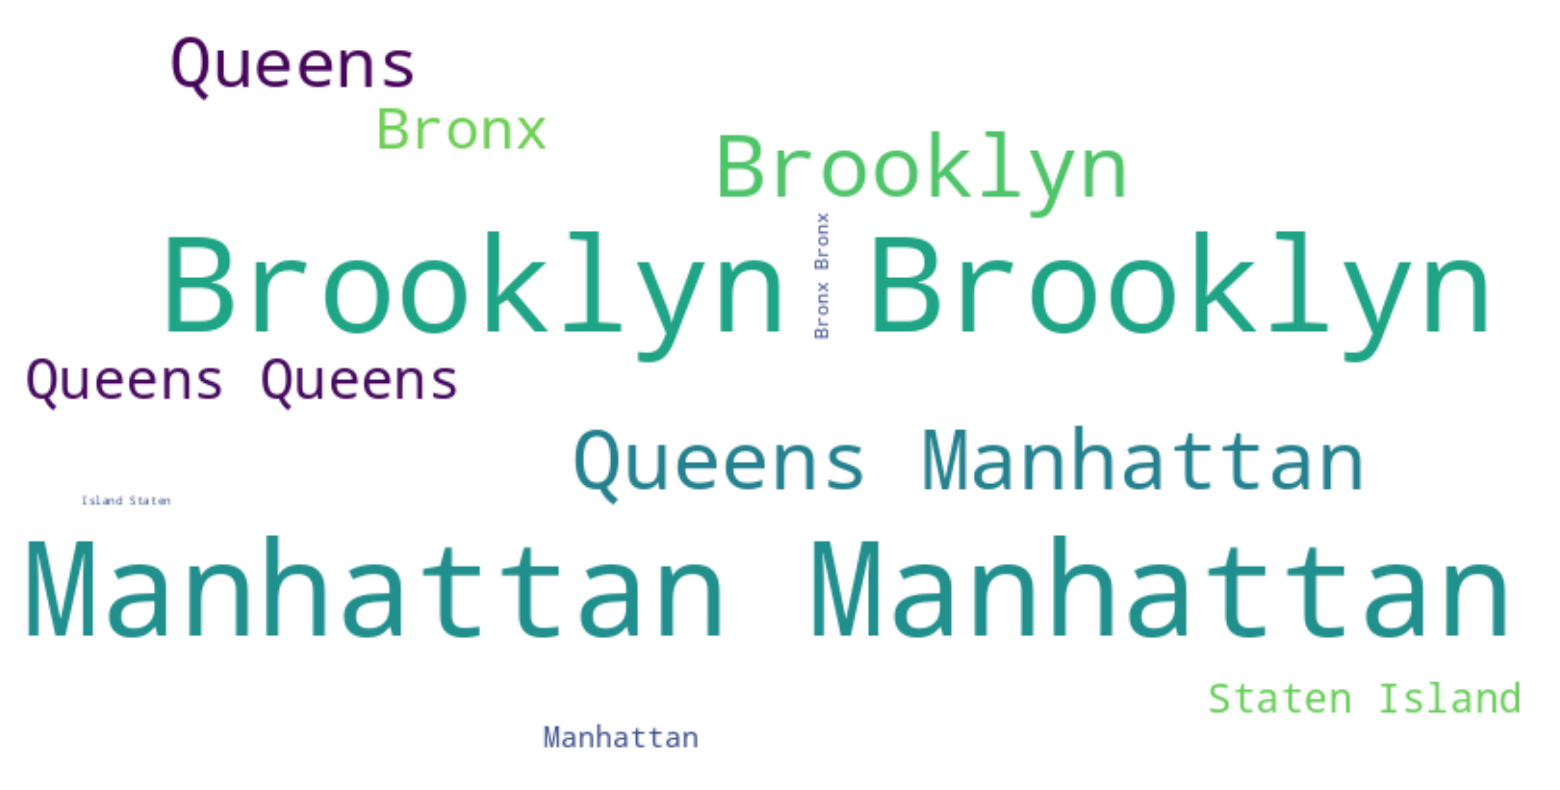

In [29]:
# Let's plot the wordcloud for neighbourhoods
neighbourhoods = nycdf['neighbourhood_group'].values

# Create a wordcloud object
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(neighbourhoods))

# Show the image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

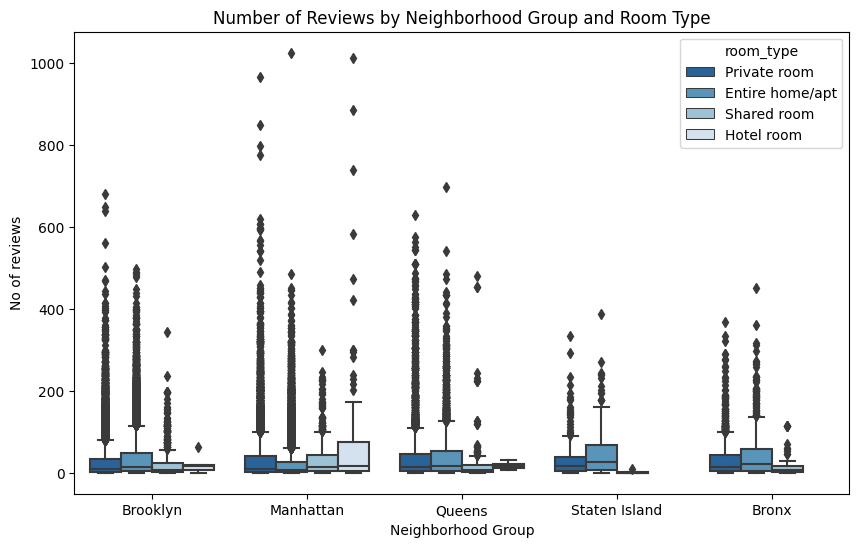

In [31]:
# Number of reviews by neighborhood group and room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='number_of_reviews', hue='room_type', data=nycdf , palette='Blues_r')
plt.title('Number of Reviews by Neighborhood Group and Room Type')
plt.xlabel('Neighborhood Group')
plt.ylabel('No of reviews')
plt.show()

Relationship between Price & Service Fee

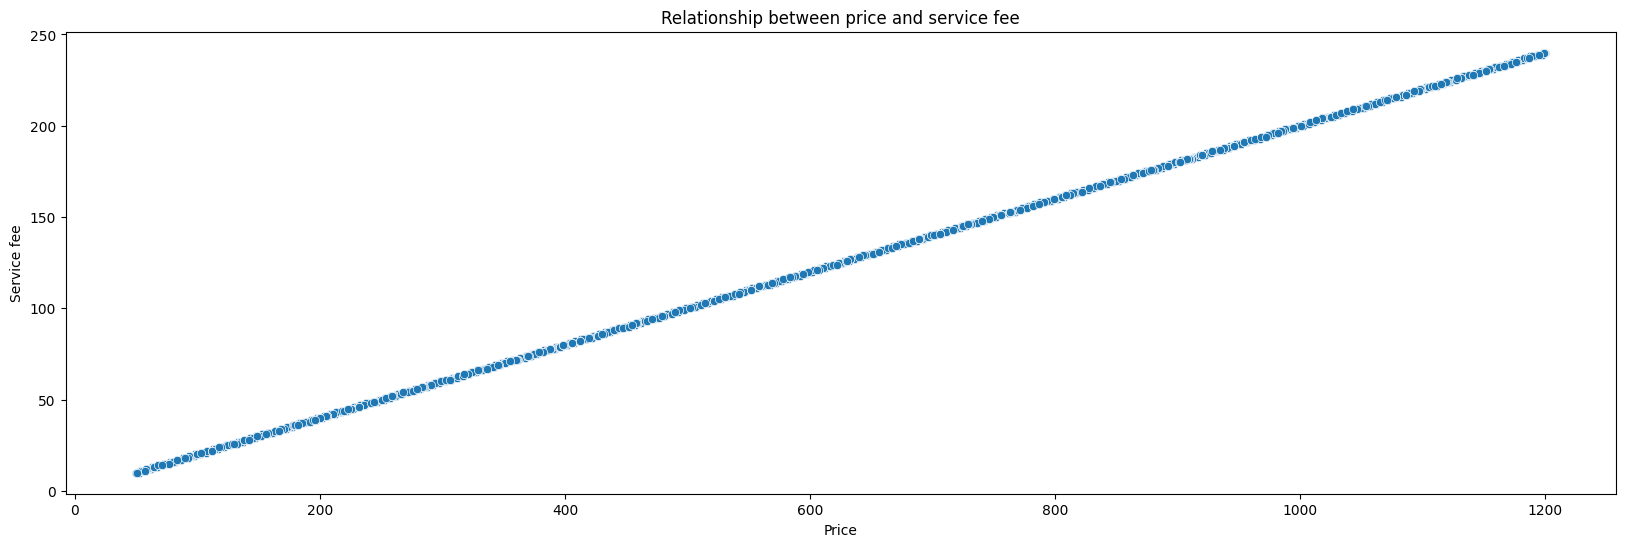

In [ ]:
plt.figure(figsize=(20, 6))
plt.title("Relationship between price and service fee")
plt.xlabel("Price")
plt.ylabel("Service fee")
sns.scatterplot(x=nycdf.price, y=nycdf.service_fee);

# Percentage and Count of Airbnb Accomodation by room type

In [ ]:
nycdf.groupby('room_type')['id'].count().sort_values(ascending=False)

# the most lisiting is of Entire Home/apt

room_type
Entire home/apt    44819
Private room       38074
Shared room         1678
Hotel room           111
Name: id, dtype: int64

[Text(0.5, 1.0, 'Percentage of NYC Airbnb accommodation by room type'),
 Text(0.5, 0, 'Room type')]

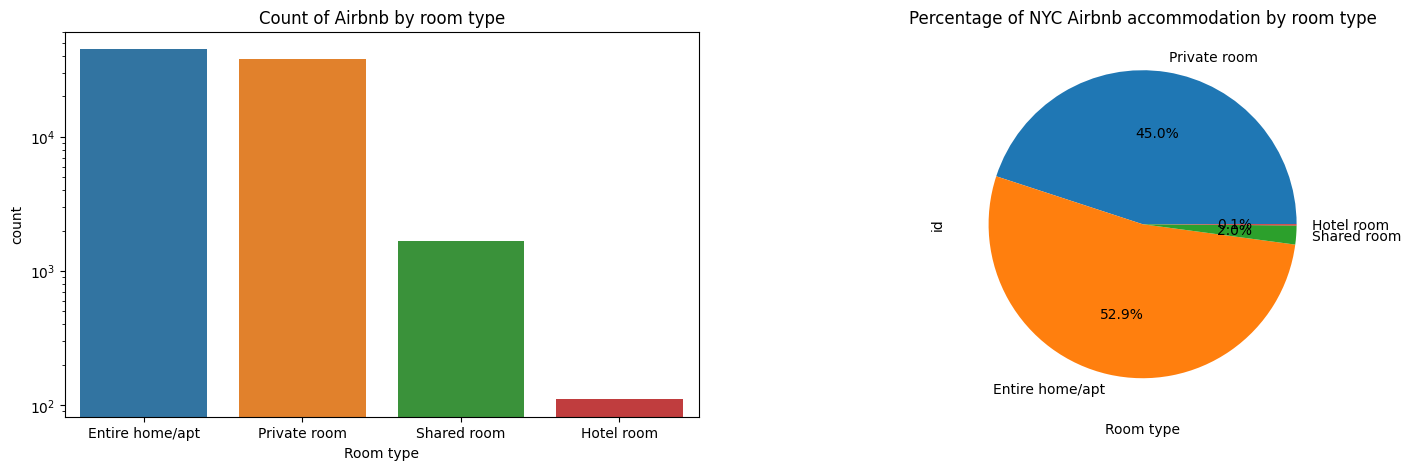

In [ ]:

#creating subplot
fig, ax = plt.subplots(1, 2, figsize=(18,5), squeeze=False)

# grouping the data by room_type to see the distribution of room count  
room_type_count = nycdf.groupby('room_type')['id'].count().sort_values(ascending=False).index

# create a pie chart data by grouping the data by room_type and counting the number of IDs
piechart = nycdf.groupby('room_type')['id'].count()

#plotting a countplot using seaborn,
sns.countplot(x='room_type', data=nycdf, order=room_type_count, ax=ax[0,0]).set(title='Count of Airbnb by room type', xlabel='Room type')

ax[0,0].set_yscale('log')

# creating piechart to see the percentage distribution using pandas
piechart.plot(kind='pie', autopct='%1.1f%%', ax=ax[0,1]).set(title='Percentage of NYC Airbnb accommodation by room type', xlabel='Room type')

(array([8385., 8383., 8225., 8744., 8568., 8557., 8331., 8400., 8518.,
        8571.]),
 array([  50.,  165.,  280.,  395.,  510.,  625.,  740.,  855.,  970.,
        1085., 1200.]),
 <BarContainer object of 10 artists>)

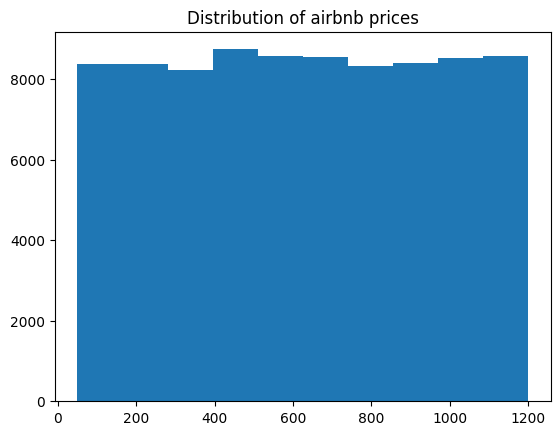

In [ ]:
plt.title("Distribution of airbnb prices")
plt.hist(nycdf.price)

# Which are the Top 5 most reviewed neighbourhoods ?

neighbourhood_group
Brooklyn         1158587
Manhattan        1024696
Queens            437233
Bronx              83106
Staten Island      32698
Name: number_of_reviews, dtype: Int64


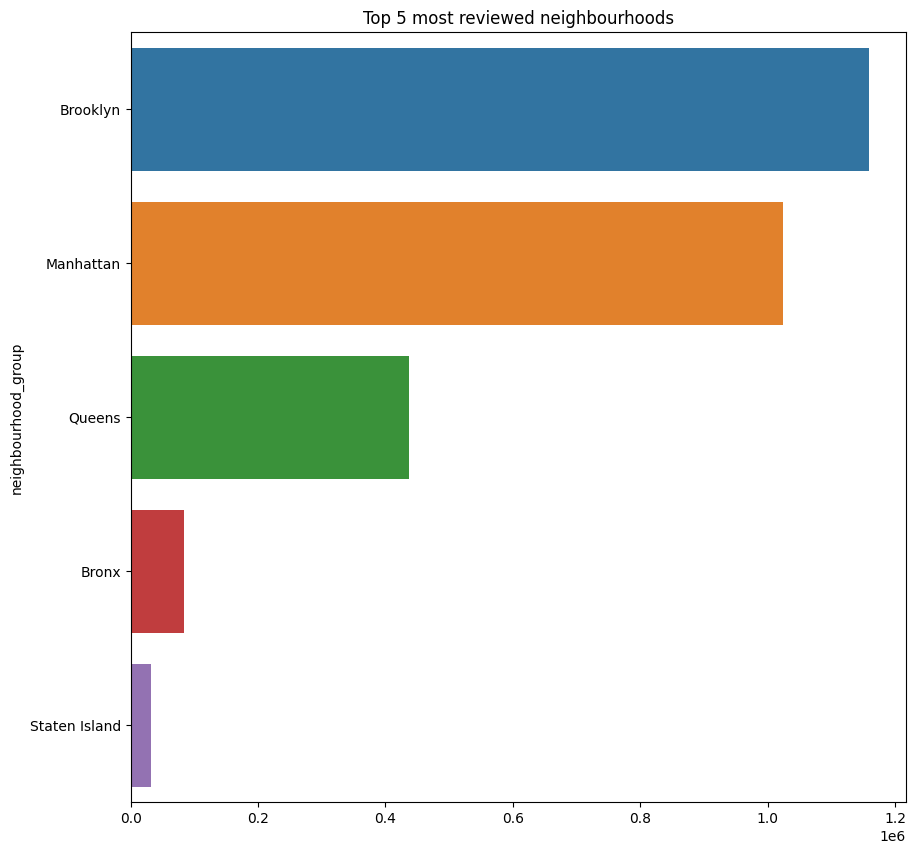

In [ ]:
top_5_review= nycdf.groupby(['neighbourhood_group'])['number_of_reviews'].sum().sort_values(ascending=False)[0:24]
print(top_5_review)
plt.figure(figsize=(10,10))
plt.title("Top 5 most reviewed neighbourhoods")
sns.barplot(x=top_5_review.values,y=top_5_review.index)
plt.show()

# Classifying Rating into Excellent Average and Bad and visualizing according to neighbourhood_group rating 

In [ ]:
# we define a function to categorize the reviews into Excellent if review number greater than 4, Average if greater than3 and bad otherwise

def ratings(review_rate_number):
    if review_rate_number >= 4:
        return 'Excellent'
    elif review_rate_number >=3:
        return 'Average'
    else:
        return 'Bad'

In [ ]:
# creating a new Column rating category
nycdf['rating_category'] = nycdf['review_rate_number'].apply(ratings)
nycdf.head()

,neighbourhood_group,id,host_id,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,host_identity_verified,instant_bookable,cancellation_policy,room_type,last_review,rating_category
0,Brooklyn,1001254,80014485718,2020,966.0,193.0,10,9,4,False,False,strict,Private room,2021-10-19,Excellent
1,Manhattan,1002102,52335172823,2007,142.0,28.0,30,45,4,True,False,moderate,Entire home/apt,2022-05-21,Excellent
3,Brooklyn,1002755,85098326012,2005,368.0,74.0,30,270,4,False,True,moderate,Entire home/apt,2019-07-05,Excellent
4,Manhattan,1003689,92037596077,2009,204.0,41.0,10,9,3,True,False,moderate,Entire home/apt,2018-11-19,Average
5,Manhattan,1004098,45498551794,2013,577.0,115.0,3,74,3,True,True,flexible,Entire home/apt,2019-06-22,Average


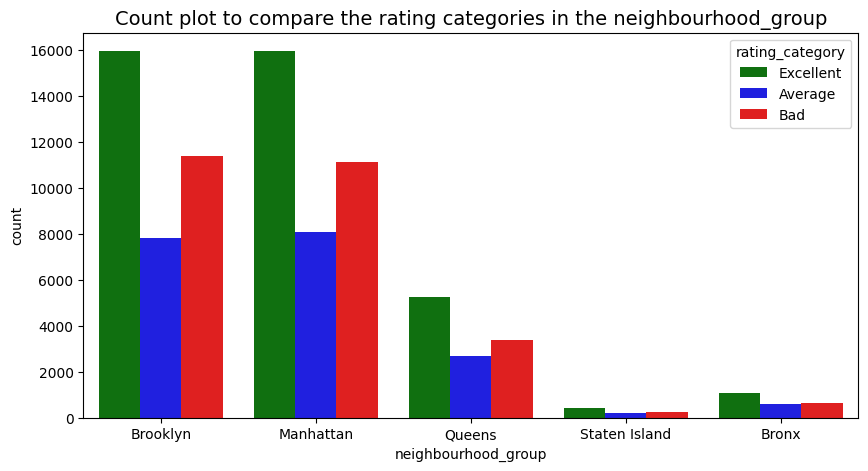

In [ ]:
# creating a count plot to compare the rating categories in the neighbourhood_group

plt.figure(figsize=(10,5))
colors = ["green", "blue", 'red']
sns.countplot(data=nycdf , x='neighbourhood_group', hue='rating_category', palette = colors)
plt.title("Count plot to compare the rating categories in the neighbourhood_group", fontsize=(14))
plt.show()

Correlation between variables

In [ ]:
Correlations = nycdf.corr(method='kendall')
Correlations

<ipython-input-41-bf6615981333>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,id,host_id,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,host_identity_verified,instant_bookable
id,1.000000,-0.000579,-0.000509,0.004779,0.004786,0.005057,-0.014926,0.022119,0.000682,0.004245
host_id,-0.000579,1.000000,0.003476,0.001848,0.001840,0.000237,-0.002597,0.002462,0.000448,0.001117
construction_year,-0.000509,0.003476,1.000000,-0.002764,-0.002762,-0.005080,0.001823,0.004840,0.002017,0.000737
price,0.004779,0.001848,-0.002764,1.000000,0.998263,-0.004419,0.001306,-0.005187,-0.001683,-0.000607
service_fee,0.004786,0.001840,-0.002762,0.998263,1.000000,-0.004417,0.001296,-0.005202,-0.001688,-0.000609
minimum_nights,0.005057,0.000237,-0.005080,-0.004419,-0.004417,1.000000,-0.134612,-0.000687,-0.005576,-0.002879
number_of_reviews,-0.014926,-0.002597,0.001823,0.001306,0.001296,-0.134612,1.000000,-0.013443,-0.002493,0.002785
review_rate_number,0.022119,0.002462,0.004840,-0.005187,-0.005202,-0.000687,-0.013443,1.000000,0.004013,0.002339
host_identity_verified,0.000682,0.000448,0.002017,-0.001683,-0.001688,-0.005576,-0.002493,0.004013,1.000000,-0.001916
instant_bookable,0.004245,0.001117,0.000737,-0.000607,-0.000609,-0.002879,0.002785,0.002339,-0.001916,1.000000


from the output we see that most of the vairables have correlation close to +1 or -1 and therefore the variables are highly correlated but except for Number of Reviews and Review rate Number

Heat Map of Correlation 

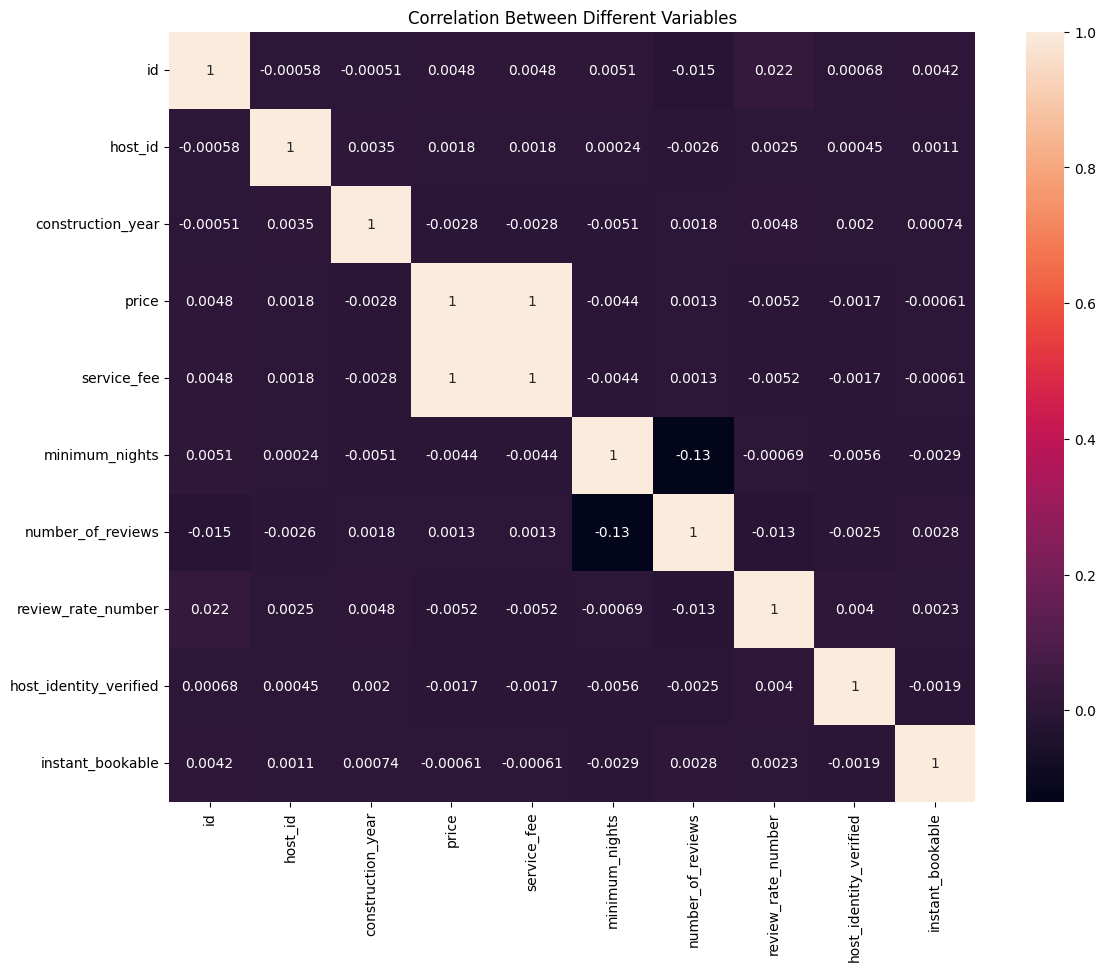

In [ ]:
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables")
sns.heatmap(Correlations, annot=True)
plt.show()

## **# Machine Learning**

In [ ]:
# splitting the data into test set and train set

In [ ]:
split_data = nycdf.copy() # creating a copy of dataframe to splitdata
split_data.columns #printing the columns

Index(['neighbourhood_group', 'id', 'host_id', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews',
       'review_rate_number', 'host_identity_verified', 'instant_bookable',
       'cancellation_policy', 'room_type', 'last_review', 'rating_category'],
      dtype='object')

In [ ]:
# since neighbord hood group is object converting it into category and dummies of zero and 1
le = LabelEncoder()
neighbourhood_group_le = LabelEncoder()
split_data['neighbourhood_group'] = neighbourhood_group_le.fit_transform(nycdf['neighbourhood_group'])
split_data['neighbourhood_group'].value_counts()

cancellation_policy_le = LabelEncoder()
split_data['cancellation_policy'] = cancellation_policy_le.fit_transform(nycdf['cancellation_policy'])
split_data['cancellation_policy'].value_counts()

instant_bookable_le = LabelEncoder()
split_data['instant_bookable'] = instant_bookable_le.fit_transform(nycdf['instant_bookable'])
split_data['instant_bookable'].value_counts()

le = LabelEncoder()
room_type_le = LabelEncoder()
split_data['room_type'] = room_type_le.fit_transform(nycdf['room_type'])
split_data['room_type'].value_counts()



0    44819
2    38074
3     1678
1      111
Name: room_type, dtype: int64

In [ ]:
# Using only the variables, that are needed for the model
split_data = split_data[['neighbourhood_group','instant_bookable','cancellation_policy','room_type','construction_year','minimum_nights','number_of_reviews','review_rate_number','price', 'service_fee','host_identity_verified']]

In [ ]:
split_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84682 entries, 0 to 102044
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_group     84682 non-null  int64  
 1   instant_bookable        84682 non-null  int64  
 2   cancellation_policy     84682 non-null  int64  
 3   room_type               84682 non-null  int64  
 4   construction_year       84682 non-null  Int64  
 5   minimum_nights          84682 non-null  Int64  
 6   number_of_reviews       84682 non-null  Int64  
 7   review_rate_number      84682 non-null  Int64  
 8   price                   84682 non-null  float64
 9   service_fee             84682 non-null  float64
 10  host_identity_verified  84682 non-null  boolean
dtypes: Int64(4), boolean(1), float64(2), int64(4)
memory usage: 7.6 MB


In [ ]:
x =split_data.drop(["price"],axis=1).values # independent variable x which is all the variables defined in the split data
y= split_data['price'].values # dependent variable y which is the price of the airbnb

In [ ]:
# split train and test dataset, with test data as 25% 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
print(x_train.shape) #printing the train data shape 
print(y_train.shape)

print(x_test.shape)#printing the test data shape
print(y_test.shape)

(63511, 10)
(63511,)
(21171, 10)
(21171,)


In [ ]:
# building a multiple linear regression model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
output =model.score(x_train,y_train)
output

0.9999818183712568

In [ ]:
model.score(x_test,y_test)

0.9999817700550387

In [ ]:
model.coef_

array([-5.05206263e-03,  6.22351077e-03,  7.86108943e-03,  1.75720282e-03,
       -4.97936011e-05, -2.57072900e-04,  2.04415894e-04,  4.84659789e-03,
        4.99971671e+00, -1.30349435e-02])

In [ ]:
y_predict = model.predict(x_test)
df_test_pred = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_predict})
df_test_pred.head(10)

,Y_test,Y_pred
0,1040.0,1039.963209
1,782.0,779.968111
2,439.0,440.004211
3,127.0,124.998164
4,553.0,554.989437
5,1048.0,1049.966068
6,767.0,764.971375
7,675.0,674.994724
8,1116.0,1114.970702
9,169.0,170.009966


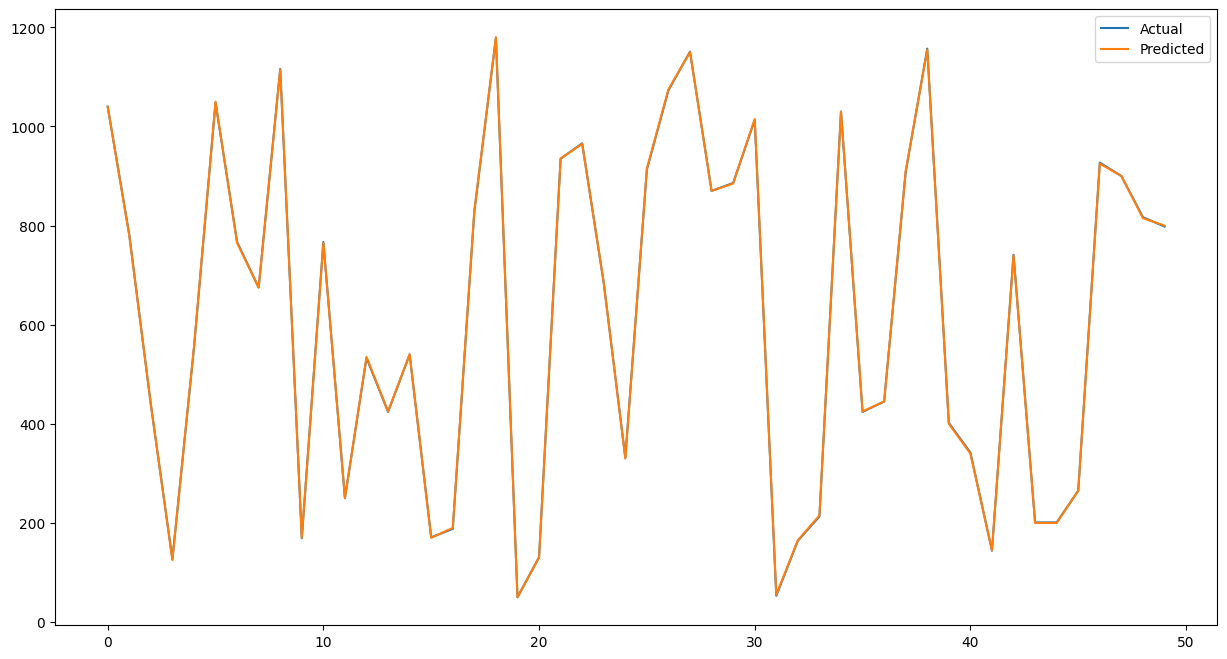

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_test_pred[:50])
plt.legend(['Actual' , 'Predicted'])
# the graph predicts the values of price 